# Clustering Assignments

## 1. K-Means Clustering

In [1]:
# 1. Read in the cereal.csv file
import pandas as pd

df = pd.read_csv('../Data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [2]:
# 2. Prep the data by dropping the name and manufacturer columns: aka only keep the numeric columns
print(df.dtypes)
#cereal = cereal[['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals']]
# OR
data = df.drop(columns=['Cereal Name','Manufacturer'])
data.head()

Cereal Name              object
Manufacturer             object
Calories                  int64
Protein (g)               int64
Fat                       int64
Sugars                    int64
Vitamins and Minerals     int64
dtype: object


,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [3]:
# 3. Fit a K-Means Clustering model with 2 clusters
# Remove warning:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data) # Initializes clustering logic

KMeans(n_clusters=2, random_state=42)

In [4]:
# 4. Interpret the cluster centers
import seaborn as sns

pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,104.558824,2.485294,0.955882,6.808824,22.058824
1,116.666667,2.666667,0.833333,6.333333,100.000000


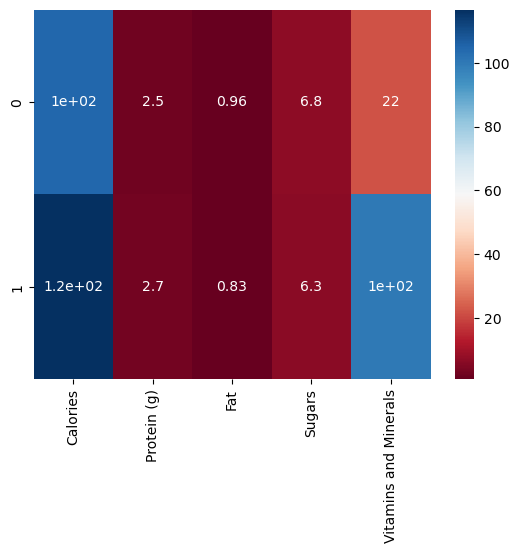

In [5]:
sns.heatmap(pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns), cmap='RdBu', annot=True);

In [6]:
# Cluster 0: Low in vitamins and minerals (cereals for kids)
# Cluster 1: High in calories and vitamins and minerals (cereals for adults)

## 2. Inertia Plot

In [7]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertia_values = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    #print(kmeans.inertia_)
    inertia_values.append(kmeans.inertia_)

inertia_values

[30041.73039215686,
 17167.537634408603,
 12430.331666666667,
 9765.241666666661,
 7403.834045584044,
 5690.000712250711,
 3951.448148148148,
 3097.281481481481,
 2676.448148148147,
 2078.190572390572,
 1657.5700534759355,
 1281.7145104895108,
 1178.2145104895108,
 779.2637529137528]

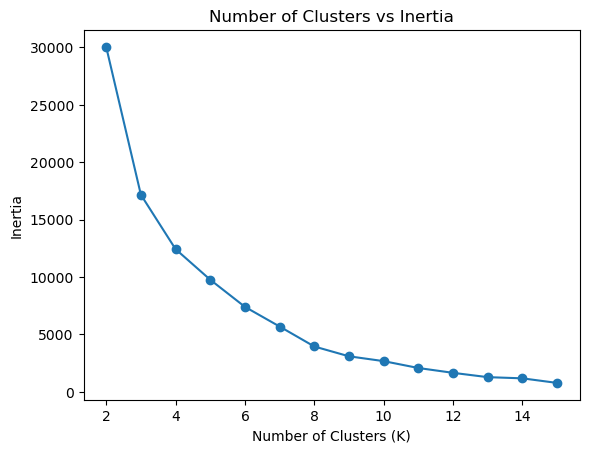

In [36]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis
import matplotlib.pyplot as plt

inertia_series = pd.Series(inertia_values, index=range(2,16))
inertia_series.plot(marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs Inertia');

In [37]:
# 3. Identify the elbow of the plot
# K = 3, maybe 4?

In [38]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data) # Initializes clustering logic

KMeans(n_clusters=3, random_state=42)

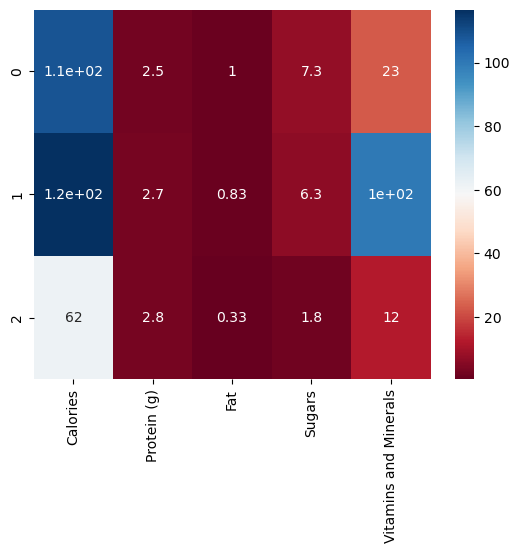

In [39]:
# 5. Interpret the cluster centers using a heat map
sns.heatmap(pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns), cmap='RdBu', annot=True);

In [ ]:
# Cluster 0: In the middle
# Cluster 1: High in caloriesm high in vitamins and minerals
# Cluster 2: Average/low in calories, low in vitamins and minerals 

## 3. Tune the K-Means Model

In [12]:
# 1. Remove the ”Fat” column


In [13]:
# 2. Standardize the remaining columns


In [14]:
# 3a. Write a loop to fit K-Means Clustering models with 2 to 15 clusters


In [15]:
# 3b. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis


In [16]:
# 3c. Identify the elbow of the plot


In [17]:
# 3d. Fit a K-Means Clustering model on the specific number of clusters at the elbow


In [18]:
# 3e. Interpret the cluster centers using a heat map


## 4. Select the Best K-Means Model

In [19]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model


In [20]:
# 2. Look at the number of cereals that fall into each cluster


In [21]:
# 3. Decide on the best model for our client


In [22]:
# 4. Recommend a specific number of displays


In [23]:
# 5. Suggest a few cereals that should be shown in each display


## 5. Hierarchical Clustering

In [24]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set


In [25]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold


In [26]:
# 3. Create a dendrogram using the 4 numeric, standardized fields (excluding “Fat”) of the cereal data set


In [27]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold


In [28]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels


In [29]:
# 6. Create a cluster map of the “best” results and interpret the clusters


## 6. DBSCAN

In [30]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models


In [31]:
# 2. Apply the function on both the original and standardized data sets


In [32]:
# 3. Find the highest silhouette score and note down the eps and min_samples values


In [33]:
# 4. Fit a final DBSCAN model with those eps and min_samples values and view the labels
